In [1132]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt

# Задача 1
**Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.**

Линейная зависимость определяется моделью $\hat y = \beta{_0} + \beta{_1} \cdot x$, где $\beta{_0}$ и $\beta{_1}$ — коэффициенты линейной регрессии. Данная модель применяется при условии наличии линейной зависимости переменной x (по условиям задачи выборка zp) от переменной y (скоринговый бал ks). Наличие линейной зависимости проверяется расчетом коэффициента корелляции или проверкой на графике. Рассчитаем коэффициент корелляции:

In [1133]:
data = pd.DataFrame(data = {'zp': [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], 'ks': [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]})
coef_cor = np.corrcoef(data['zp'], data['ks'])[0][1]
print (f'Коэффициент корелляции — {coef_cor}')

Коэффициент корелляции — 0.8874900920739162


Рассчитанный коэффициент корелляции — 0.8875. Он близок к единице, но необходимо убедиться в его значимости. Для этого сформулируем две гипотезы:

$H_0: \rho = 0$ — коэффициент корелляции равен нулю, то есть линейной зависимости скорингового балла от заработной платы не существует.

$H_1: \rho \neq 0$ — существует линейная зависимость скорингового балла от заработной платы.

Уровень значимости $\alpha$ примем равным 0.01. Для проверки гипотезы $H_0$ используем статистический критерий Стьюдента $t = \frac {r_e\sqrt{n-2}}{\sqrt{1 - {r_e}^2}}$; где n — объем выборки (в нашем случае 10), а $r_e$ — коэффициент корелляции. Полученное значение t сравним с табличным значением критических точек распределения. Количество степеней свободы k определяем по формуле $k = n - m - 1$, где n — объем выборки (10), m — количество оцениваемых параметров (оцениваем только коэффициент корелляции, т. е. m = 1).

In [1134]:
alpha = 0.01
n = 10
m = 1
k =  n - m - 1
t = coef_cor * np.sqrt(n-2) / np.sqrt(1 - coef_cor**2)
t_score = st.t.ppf(1 - alpha/2, k)
if t < t_score:
    print ("Принимаеся гипотеза H0")
else:
    print ("Гипотеза H0 отвергается")

Гипотеза H0 отвергается


Гипотеза о том, что коэффициент корелляции равен нулю при $\alpha = 0.01$ отвергается. Коэффициент корелляции является значимым, т. е. между заработной платой и кредитным скорингом есть линейная зависимость. Продемонстрируем это на графике:

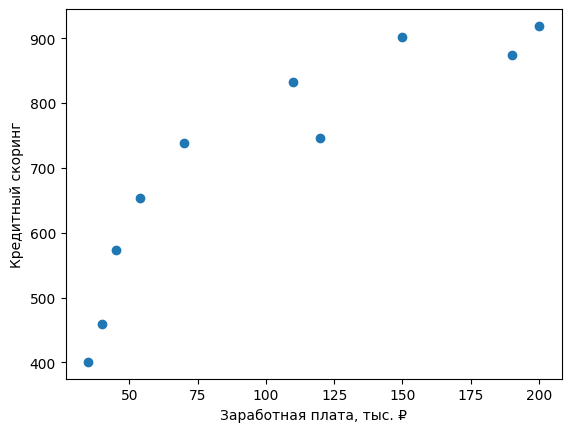

In [1135]:
plt.scatter(data['zp'], data['ks'])
plt.xlabel("Заработная плата, тыс. ₽")
plt.ylabel("Кредитный скоринг")
plt.show()

На графике видна прямая зависимость кредитного скоринга от заработной платы, но она может быть и не линейной, а логарифмической $\hat y = \beta{_0} + \beta{_1} \cdot log(x)$. Тем не менее, примем более простую линейную модель и рассчитаем коэффициенты линейной регрессии $\beta{_0}$ и $\beta{_1}$. Рассчет коэффициентов производися по формулам:

$\beta{_1} = \frac{n \cdot \sum _{i = 1}^n {x_i \cdot y_i} - (\sum _{i = 1}^n {x_i}) \cdot (\sum _{i = 1}^n {y_i})}{n \cdot \sum _{i = 1}^n {x_i^2} - ({\sum _{i = 1}^n {x_i}})^2}$; $\beta{_0} = \bar y - \beta{_1} \cdot \bar x$. Рассчитаем коэффициенты.

b0 = 444.1774, b1 = 2.6205


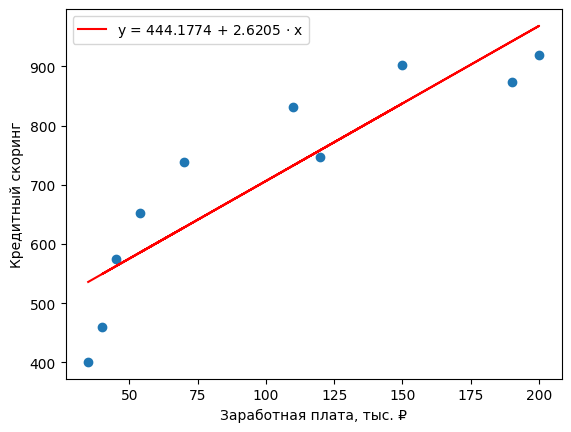

In [1136]:
b1 = (n * np.sum(data['zp']*data['ks']) - np.sum (data['zp']) * np.sum(data['ks'])) / (n * np.sum(data['zp'] ** 2) - np.sum(data['zp']) **2 )
b0 = np.mean(data['ks']) - b1 * np.mean(data['zp'])
data['ks_pred'] = data['zp'].map(lambda x: round(b0 + b1 * x))
print (f'b0 = {round (b0, 4)}, b1 = {round (b1, 4)}')
plt.scatter(data['zp'], data['ks'])
plt.plot(data['zp'], b0 + b1 * data['zp'], c = 'r', label = f'y = {round(b0, 4)} + {round(b1, 4)} $\cdot$ x')
plt.legend()
plt.xlabel("Заработная плата, тыс. ₽")
plt.ylabel("Кредитный скоринг")
plt.show()

Уравнение линейной регрессии с интерсептом имеет вид:  $\hat y = 444.1774 + 2.6205 \cdot x$.

Коэффициенты линейной регрессии также можно расссчитать матричнцым методом:

$ Y = X \cdot B \newline$ или  $\newline\begin{pmatrix}
y_1\\
…\\
y_n
\end{pmatrix} = 
\begin{pmatrix}
1 & x_1\\
… & …\\
1 & x_n
\end{pmatrix} \cdot
\begin{pmatrix}
\beta_0\\
\beta_1
\end{pmatrix}$

Хотя построение модеи с интерсептом предпочтительнее, в том случае, когда рассчет интерсепта ($\beta_{1}$) не требуется, то коэффициент $\beta_{0}$ рассчитывается матричным методом исходя из формулы:

$\begin{pmatrix}
y_1\\
…\\
y_n
\end{pmatrix} = 
\begin{pmatrix}
x_1\\
…\\
x_n
\end{pmatrix} \cdot 
\begin{pmatrix}
\beta_0
\end{pmatrix}$

Преобразуем данные в матрицы и произведем рассчет:

b0_matrix = 5.8898


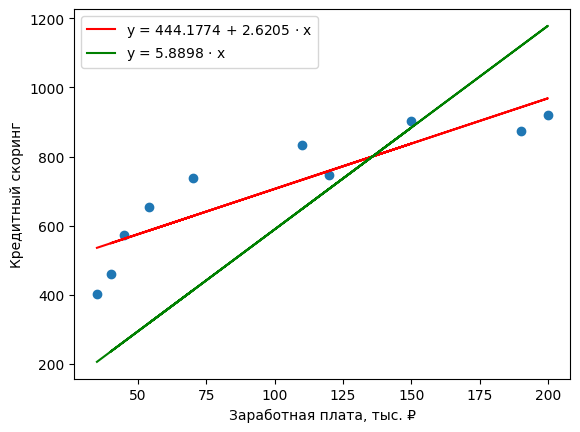

In [1137]:
x_matrix = np.array(data['zp']).reshape(n, 1)
y_matrix = np.array(data['ks']).reshape(n, 1)
b1_matrix = round(np.dot(np.linalg.inv(np.dot(x_matrix.T, x_matrix)), np.dot(x_matrix.T, y_matrix))[0][0], 4)
data['ks_pred_matrix'] = data['zp'].map(lambda x: round(b1_matrix * x))
print (f'b0_matrix = {b1_matrix}')

plt.scatter(data['zp'], data['ks'])
plt.plot(data['zp'], b0 + b1 * data['zp'], c = 'r', label = f'y = {round(b0, 4)} + {round(b1, 4)} $\cdot$ x')
plt.plot(data['zp'], b1_matrix * data['zp'], c = 'g', label = f'y = {round(b1_matrix, 4)} $\cdot$ x')
plt.legend()
plt.xlabel("Заработная плата, тыс. ₽")
plt.ylabel("Кредитный скоринг")
plt.show()

Уравнение линейной регрессии без интерсепта имеет вид:  $\hat y = 5.8898 \cdot x$.

*Ответ: $\hat y = 444.1774 + 2.6205 \cdot x$ ; $\hat y = 5.8898 \cdot x$.*

# Задача 2
**Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).**

Для вычисления коэффициента линейной регрессии требуется рассчет средней квадратичной ошибки, которая вычесляется по формуле:

$mse = \frac{\sum(y - y_{pred})^2}{n}$; зададим ее:

In [1138]:
def mse (beta_1: float, x_data: np.array, y_data: np.array) -> float:
    return np.sum((y_data - (beta_1 * x_data)) ** 2) / len(x_data)

Скорость обучения задается коэффициентом $\alpha$, задается начальный коэффициент $\beta{_1}$. По условиям задачи нам не требуется находить интерсепт, значит принимаем $\beta{_0} = 0$.

In [1139]:
alpha: float = 0.000001 # 1e-6
beta_0: float = 0.0
beta_1: float = 0.1

Зададим функцию рассчета коэффициента $\beta_1$:

In [1140]:
def calc_beta_one (alpha: float, beta_1: float, x_data: np.array, y_data:np.array, digit_capacity: int = 4) -> list:
    i = 0
    mse_current = mse(beta_1, x_data, y_data)
    while (True):
        i += 1
        mse_prev = mse_current
        beta_1 -= alpha * (2 / n) * np.sum ((beta_1 * x_data - y_data) * x_data) # производная средне-квадратичной ошибки
        mse_current = mse(beta_1, x_data, y_data)
        if mse_current > mse_prev:
            return [i, round(beta_1, digit_capacity)]


Производим расчет коэффициента $\beta_{1}$:

In [1141]:
flag: bool = False
i, beta_1 = calc_beta_one (alpha, beta_1, data['zp'], data['ks'])
print (f'beta_1 = {beta_1}. Количество итераций = {i}')


beta_1 = 5.8898. Количество итераций = 630


*Ответ: $\beta_1=5.8898$*

# Задача 3
**Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).**

Зададим функции расчета потерь и частных производных функции потерь по beta_0 и beta_1.

In [1142]:
def mse_xy  (beta_0: float, beta_1: float, x_data: np.array, y_data: np.array) -> float:
    return np.sum(((beta_0 + beta_1 * x_data) - y_data) ** 2) / len(x_data)

def mse_beta_0 (beta_0: float, beta_1: float, x_data: np.array, y_data: np.array) -> float:
    return 2 * np.sum((beta_0 + beta_1 * x_data) - y_data) / len (x_data)

def mse_beta_1 (beta_0: float, beta_1: float, x_data: np.array, y_data: np.array) -> float:
    return 2 * np.sum(((beta_0 + beta_1 * x_data) - y_data) * x_data) / len (x_data)

Задаем начальные параметры, считаем:

In [1153]:
max_iter = 1_000_000
cur_iter = 0
alpha = 7e-5
beta_0 = 500.0
beta_1 = 0.1
flag = False

current_mse = mse_xy (beta_0, beta_1, data['zp'], data['ks'])

while ((not flag) and (cur_iter < max_iter)):
    cur_iter += 1
    prev_mse = current_mse
    beta_0 -= alpha * mse_beta_0 (beta_0, beta_1, data['zp'], data['ks'])
    beta_1 -= alpha * mse_beta_1 (beta_0, beta_1, data['zp'], data['ks'])
    current_mse = mse_xy (beta_0, beta_1, data['zp'], data['ks'])
    if cur_iter % 50_000 == 0:
        print (f'beta_0 = {round(beta_0, 4)}. beta_1 = {round(beta_1, 4)}. Количество итераций = {cur_iter}')
    if current_mse > prev_mse:
        flag = True
print (f'beta_0 = {round(beta_0, 4)}. beta_1 = {round(beta_1, 4)}. Количество итераций = {cur_iter}')

beta_0 = 453.6337. beta_1 = 2.5509. Количество итераций = 50000
beta_0 = 445.7788. beta_1 = 2.6088. Количество итераций = 100000
beta_0 = 444.4486. beta_1 = 2.6185. Количество итераций = 150000
beta_0 = 444.2233. beta_1 = 2.6202. Количество итераций = 200000
beta_0 = 444.1851. beta_1 = 2.6205. Количество итераций = 250000
beta_0 = 444.1787. beta_1 = 2.6205. Количество итераций = 300000
beta_0 = 444.178. beta_1 = 2.6205. Количество итераций = 319465


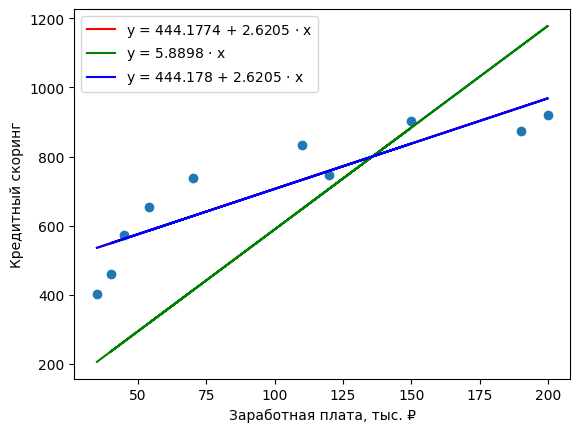

In [1154]:
plt.scatter(data['zp'], data['ks'])
plt.plot(data['zp'], b0 + b1 * data['zp'], c = 'r', label = f'y = {round(b0, 4)} + {round(b1, 4)} $\cdot$ x')
plt.plot(data['zp'], b1_matrix * data['zp'], c = 'g', label = f'y = {round(b1_matrix, 4)} $\cdot$ x')
plt.plot(data['zp'], beta_0 + beta_1 * data['zp'], c = 'b', label = f'y = {round(beta_0, 4)} + {round(beta_1, 4)} $\cdot$ x')
plt.legend()
plt.xlabel("Заработная плата, тыс. ₽")
plt.ylabel("Кредитный скоринг")
plt.show()

*Ответ: $\hat y = 444.1780 + 2.6205 \cdot x$.*